#### csv파일을 로드해서 결합
1. transaction_1,2, detail_1,2 총 4개 로드
2. transaction_1,2 단순 행 결합
3. transaction detail_1,2도 단순 행 결합
4. 특정 조건을 가지고 2번, 3번에서 나온 df를 열 결합

In [14]:
import pandas as pd

In [25]:
df1 = pd.read_csv('../practice1/data/transaction_1.csv')
df2 = pd.read_csv('../practice1/data/transaction_2.csv')
df3 = pd.read_csv('../practice1/data/transaction_detail_1.csv')
df4 = pd.read_csv('../practice1/data/transaction_detail_2.csv')

In [26]:
df1

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865
...,...,...,...,...
4995,T0000005108,210000,2019-06-15 02:42:41,HD315748
4996,T0000005109,150000,2019-06-15 03:36:16,HI215420
4997,T0000005110,50000,2019-06-15 03:44:06,IK880102
4998,T0000005111,210000,2019-06-15 04:14:06,IK074758


In [27]:
df2

,transaction_id,price,payment_date,customer_id
0,T0000005113,295000,2019-06-15 07:20:27,TS169261
1,T0000005114,50000,2019-06-15 07:35:47,HI599892
2,T0000005115,85000,2019-06-15 07:56:36,HI421757
3,T0000005116,50000,2019-06-15 08:40:55,OA386378
4,T0000005117,120000,2019-06-15 08:44:23,TS506913
...,...,...,...,...
1781,T0000006894,180000,2019-07-31 21:20:44,HI400734
1782,T0000006895,85000,2019-07-31 21:52:48,AS339451
1783,T0000006896,100000,2019-07-31 23:35:25,OA027325
1784,T0000006897,85000,2019-07-31 23:39:35,TS624738


In [28]:
#2. 단순 행 결합하기
df12 = pd.concat([df1,df2], axis=0, ignore_index=True)
df12
#
#df12 = merge(df1, df2, on='transaction_id')

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865
...,...,...,...,...
6781,T0000006894,180000,2019-07-31 21:20:44,HI400734
6782,T0000006895,85000,2019-07-31 21:52:48,AS339451
6783,T0000006896,100000,2019-07-31 23:35:25,OA027325
6784,T0000006897,85000,2019-07-31 23:39:35,TS624738


In [29]:
df3

,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1
3,3,T0000000116,S005,1
4,4,T0000000117,S002,2
...,...,...,...,...
4995,4995,T0000004865,S003,1
4996,4996,T0000004866,S001,3
4997,4997,T0000004867,S001,3
4998,4998,T0000004868,S005,1


In [30]:
df4

,detail_id,transaction_id,item_id,quantity
0,5000,T0000004870,S002,3
1,5001,T0000004871,S003,1
2,5002,T0000004872,S001,2
3,5003,T0000004873,S004,1
4,5004,T0000004874,S003,2
...,...,...,...,...
2139,7139,T0000006894,S004,1
2140,7140,T0000006895,S002,1
2141,7141,T0000006896,S001,2
2142,7142,T0000006897,S002,1


In [31]:
#단순 행 결합
df34 = pd.concat([df3,df4], axis=0, ignore_index=True)
df34

,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1
3,3,T0000000116,S005,1
4,4,T0000000117,S002,2
...,...,...,...,...
7139,7139,T0000006894,S004,1
7140,7140,T0000006895,S002,1
7141,7141,T0000006896,S001,2
7142,7142,T0000006897,S002,1


In [32]:
#2번, 3번 df를 특정 조건을 가지고 열 결합
from pandas import merge

df1234 = merge(df12, df34, on='transaction_id')

In [33]:
df1234

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1
1,T0000000114,50000,2019-02-01 01:37:23,HD678019,1,S001,1
2,T0000000115,120000,2019-02-01 02:34:19,HD298120,2,S003,1
3,T0000000116,210000,2019-02-01 02:47:23,IK452215,3,S005,1
4,T0000000117,170000,2019-02-01 04:33:46,PL542865,4,S002,2
...,...,...,...,...,...,...,...
7139,T0000006894,180000,2019-07-31 21:20:44,HI400734,7139,S004,1
7140,T0000006895,85000,2019-07-31 21:52:48,AS339451,7140,S002,1
7141,T0000006896,100000,2019-07-31 23:35:25,OA027325,7141,S001,2
7142,T0000006897,85000,2019-07-31 23:39:35,TS624738,7142,S002,1


In [34]:
# pd.to_datetime으로 변경해주기
df1234["payment_date"] = pd.to_datetime(df1234["payment_date"])

In [35]:
df1234

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1
1,T0000000114,50000,2019-02-01 01:37:23,HD678019,1,S001,1
2,T0000000115,120000,2019-02-01 02:34:19,HD298120,2,S003,1
3,T0000000116,210000,2019-02-01 02:47:23,IK452215,3,S005,1
4,T0000000117,170000,2019-02-01 04:33:46,PL542865,4,S002,2
...,...,...,...,...,...,...,...
7139,T0000006894,180000,2019-07-31 21:20:44,HI400734,7139,S004,1
7140,T0000006895,85000,2019-07-31 21:52:48,AS339451,7140,S002,1
7141,T0000006896,100000,2019-07-31 23:35:25,OA027325,7141,S001,2
7142,T0000006897,85000,2019-07-31 23:39:35,TS624738,7142,S002,1


#### 데이터 결합
1. customer_master, item_master 파일 로드
2. join_data 특정 조건에 맞게 열 추가
3. 결합이 된 데이터에서 quantity 컬럼, item_price 컬럼 존재 두 개의 곱을 하여 새로운 파생변수(total_price) 생성
4. 6개 csv 파일이 결합된 데이터프레임에서 payment_date컬럼의 값으로 payment_month 새로운 파생변수에 들어갈 값은 년~월까지
5. payment_month를 기준으로 그룹화하여 total_price 합을 구하고
6. 시각화

In [36]:
import pandas as pd

master1 = pd.read_csv('../practice1/data/customer_master.csv')
master2 = pd.read_csv('../practice1/data/item_master.csv')

In [37]:
master1

,customer_id,customer_name,registration_date,email,gender,age,birth,pref
0,IK152942,김서준,2019-01-01 0:25,hirata_yuujirou@example.com,M,29,1990-06-10,대전광역시
1,TS808488,김예준,2019-01-01 1:13,tamura_shiori@example.com,F,33,1986-05-20,인천광역시
2,AS834628,김도윤,2019-01-01 2:00,hisano_yuki@example.com,F,63,1956-01-02,광주광역시
3,AS345469,김시우,2019-01-01 4:48,tsuruoka_kaoru@example.com,M,74,1945-03-25,인천광역시
4,GD892565,김주원,2019-01-01 4:54,oouchi_takashi@example.com,M,54,1965-08-05,울산광역시
...,...,...,...,...,...,...,...,...
4995,AS677229,정우석,2019-07-31 16:52,hirayama_risa@example.com,F,77,1941-10-17,대전광역시
4996,HD758694,정영훈,2019-07-31 19:09,nakahara_mahiru@example.com,F,27,1991-11-13,광주광역시
4997,PL538517,정준기,2019-07-31 19:30,tabata_yuu1@example.com,F,73,1945-12-28,대전광역시
4998,OA955088,정도형,2019-07-31 22:32,setouchi_hikaru@example.com,F,75,1944-04-09,부산광역시


In [38]:
master2

,item_id,item_name,item_price
0,S001,PC-A,50000
1,S002,PC-B,85000
2,S003,PC-C,120000
3,S004,PC-D,180000
4,S005,PC-E,210000


In [48]:
from pandas import merge

joindata = merge(df1234 ,master1, on='customer_id', how='left')
joindata2 = merge(joindata, master2, on='item_id', how='left')

In [47]:
print(joindata)
print(joindata2)

     transaction_id   price        payment_date customer_id  detail_id  \
0       T0000000113  210000 2019-02-01 01:36:57    PL563502          0   
1       T0000000162   50000 2019-02-02 18:23:27    PL563502         49   
2       T0000000235   50000 2019-02-04 19:53:45    PL563502        127   
3       T0000006088   50000 2019-07-10 10:48:25    PL563502       6291   
4       T0000000114   50000 2019-02-01 01:37:23    HD678019          1   
...             ...     ...                 ...         ...        ...   
7139    T0000006881   85000 2019-07-31 14:19:05    AS976422       7125   
7140    T0000006882  200000 2019-07-31 14:46:46    HD030302       7126   
7141    T0000006887  210000 2019-07-31 19:43:42    AS961301       7132   
7142    T0000006890  120000 2019-07-31 20:25:02    AS554975       7135   
7143    T0000006892  210000 2019-07-31 20:57:14    PL482487       7137   

     item_id  quantity customer_name registration_date  \
0       S005         1           김태경  2019-01-07 14:3

In [52]:
joindata2["total_price"] = joindata2['quantity']*joindata2['item_price']
joindata2.head()

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity,customer_name,registration_date,email,gender,age,birth,pref,item_name,item_price,total_price
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1,김태경,2019-01-07 14:34,imoto_yoshimasa@example.com,M,30,1989-07-15,대전광역시,PC-E,210000,210000
1,T0000003439,420000,2019-04-30 02:39:00,HD298120,3494,S005,1,김강현,2019-01-11 8:16,yamane_kogan@example.com,M,42,1977-05-17,광주광역시,PC-E,210000,210000
2,T0000003439,420000,2019-04-30 02:39:00,HD298120,3495,S005,1,김강현,2019-01-11 8:16,yamane_kogan@example.com,M,42,1977-05-17,광주광역시,PC-E,210000,210000
3,T0000000116,210000,2019-02-01 02:47:23,IK452215,3,S005,1,김주한,2019-01-10 5:07,ikeda_natsumi@example.com,F,47,1972-03-17,인천광역시,PC-E,210000,210000
4,T0000000832,210000,2019-02-19 19:48:24,IK452215,753,S005,1,김주한,2019-01-10 5:07,ikeda_natsumi@example.com,F,47,1972-03-17,인천광역시,PC-E,210000,210000


In [64]:
#joindata2["payment_month"] = joindata2['payment_date'].dt.strftime("%Y-%m")

joindata2['payment_month'] = joindata2['payment_date'].apply(lambda x:x.strftime('%Y-%m'))

In [61]:
joindata2.head()

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity,customer_name,registration_date,email,gender,age,birth,pref,item_name,item_price,total_price,YearMonth
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1,김태경,2019-01-07 14:34,imoto_yoshimasa@example.com,M,30,1989-07-15,대전광역시,PC-E,210000,210000,2019-02
1,T0000003439,420000,2019-04-30 02:39:00,HD298120,3494,S005,1,김강현,2019-01-11 8:16,yamane_kogan@example.com,M,42,1977-05-17,광주광역시,PC-E,210000,210000,2019-04
2,T0000003439,420000,2019-04-30 02:39:00,HD298120,3495,S005,1,김강현,2019-01-11 8:16,yamane_kogan@example.com,M,42,1977-05-17,광주광역시,PC-E,210000,210000,2019-04
3,T0000000116,210000,2019-02-01 02:47:23,IK452215,3,S005,1,김주한,2019-01-10 5:07,ikeda_natsumi@example.com,F,47,1972-03-17,인천광역시,PC-E,210000,210000,2019-02
4,T0000000832,210000,2019-02-19 19:48:24,IK452215,753,S005,1,김주한,2019-01-10 5:07,ikeda_natsumi@example.com,F,47,1972-03-17,인천광역시,PC-E,210000,210000,2019-02


In [88]:
#week_corona = corona_df_copy.groupby("요일").mean()

groupdf = joindata2.groupby('payment_month').sum()["total_price"]
groupdf

payment_month
2019-02    160185000
2019-03    160370000
2019-04    160510000
2019-05    155420000
2019-06    164030000
2019-07    170620000
Name: total_price, dtype: int64

In [77]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

file_path = "C:/Windows/Fonts/12롯데마트드림MEDIUM_0.TTF"
font = font_manager.FontProperties(fname = file_path).get_name()
rc('font', family=font)

In [92]:
groupdf = pd.DataFrame(groupdf)
groupdf

,total_price
payment_month,
2019-02,160185000
2019-03,160370000
2019-04,160510000
2019-05,155420000
2019-06,164030000
2019-07,170620000


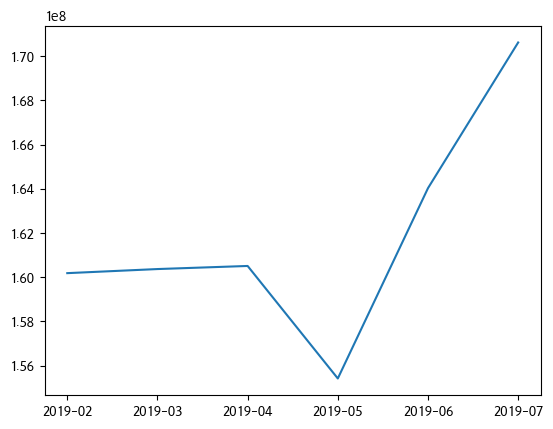

In [96]:
plt.plot(groupdf)